<a href="https://colab.research.google.com/github/RahulArra/Machine-Learning/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/Datasets/house_price_train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:

cols_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df_cleaned = df.drop(columns=cols_to_drop)

df_cleaned['LotFrontage'] = df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].median())
df_cleaned['MasVnrArea'] = df_cleaned['MasVnrArea'].fillna(0)
df_cleaned['GarageYrBlt'] = df_cleaned['GarageYrBlt'].fillna(0)

for col in ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_cleaned[col] = df_cleaned[col].fillna('None')

df_cleaned['Electrical'] = df_cleaned['Electrical'].fillna(df_cleaned['Electrical'].mode()[0])

print("Missing values remaining:", df_cleaned.isnull().sum().sum())

Missing values remaining: 0


In [75]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=['SalePrice', 'Id'])
y = df_cleaned['SalePrice']

# One-Hot Encode all categorical features
X = pd.get_dummies(X)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1168, 285)
Testing set shape: (292, 285)


In [76]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,False,False,False,True,False,False,False,False,True,False
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,False,False,False,True,False,False,False,False,True,False
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,False,False,False,True,False,False,False,False,True,False


In [77]:
X_train.isnull().sum()

,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
...,...
SaleCondition_AdjLand,0
SaleCondition_Alloca,0
SaleCondition_Family,0
SaleCondition_Normal,0


In [78]:
import numpy as np
constant_features2 = [cols for cols in X_train.columns if X_train[cols].nunique() == 1]

len(constant_features2)

2

In [79]:
X_train = X_train.drop(columns=constant_features2)
X_test = X_test.drop(columns=constant_features2)

Quasi Constanat features

In [80]:
quasi_constant_feature =[]
for feature in X_train.columns :
  predominant = (X_train[feature].value_counts() / np.float64(len(X_train))).sort_values(ascending=False).values[0]

  if predominant > 0.96:
    quasi_constant_feature.append(feature)

print(quasi_constant_feature)

['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal', 'MSZoning_C (all)', 'MSZoning_RH', 'Street_Grvl', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnh

In [81]:
X_train = X_train.drop(columns=quasi_constant_feature)
X_test = X_test.drop(columns=quasi_constant_feature)

In [82]:
print(X_train.shape)
print(X_test.shape)

(1168, 132)
(292, 132)


In [83]:
duplicated_feat_fast = X_train.T.duplicated()
duplicated_columns = X_train.columns[duplicated_feat_fast].tolist()
print("Duplicate columns found with the faster method:")
print(duplicated_columns)

Duplicate columns found with the faster method:
['GarageFinish_None', 'GarageQual_None', 'GarageCond_None']


In [84]:
X_train = X_train.drop(columns=duplicated_columns)
X_test = X_test.drop(columns= duplicated_columns)

<Axes: >

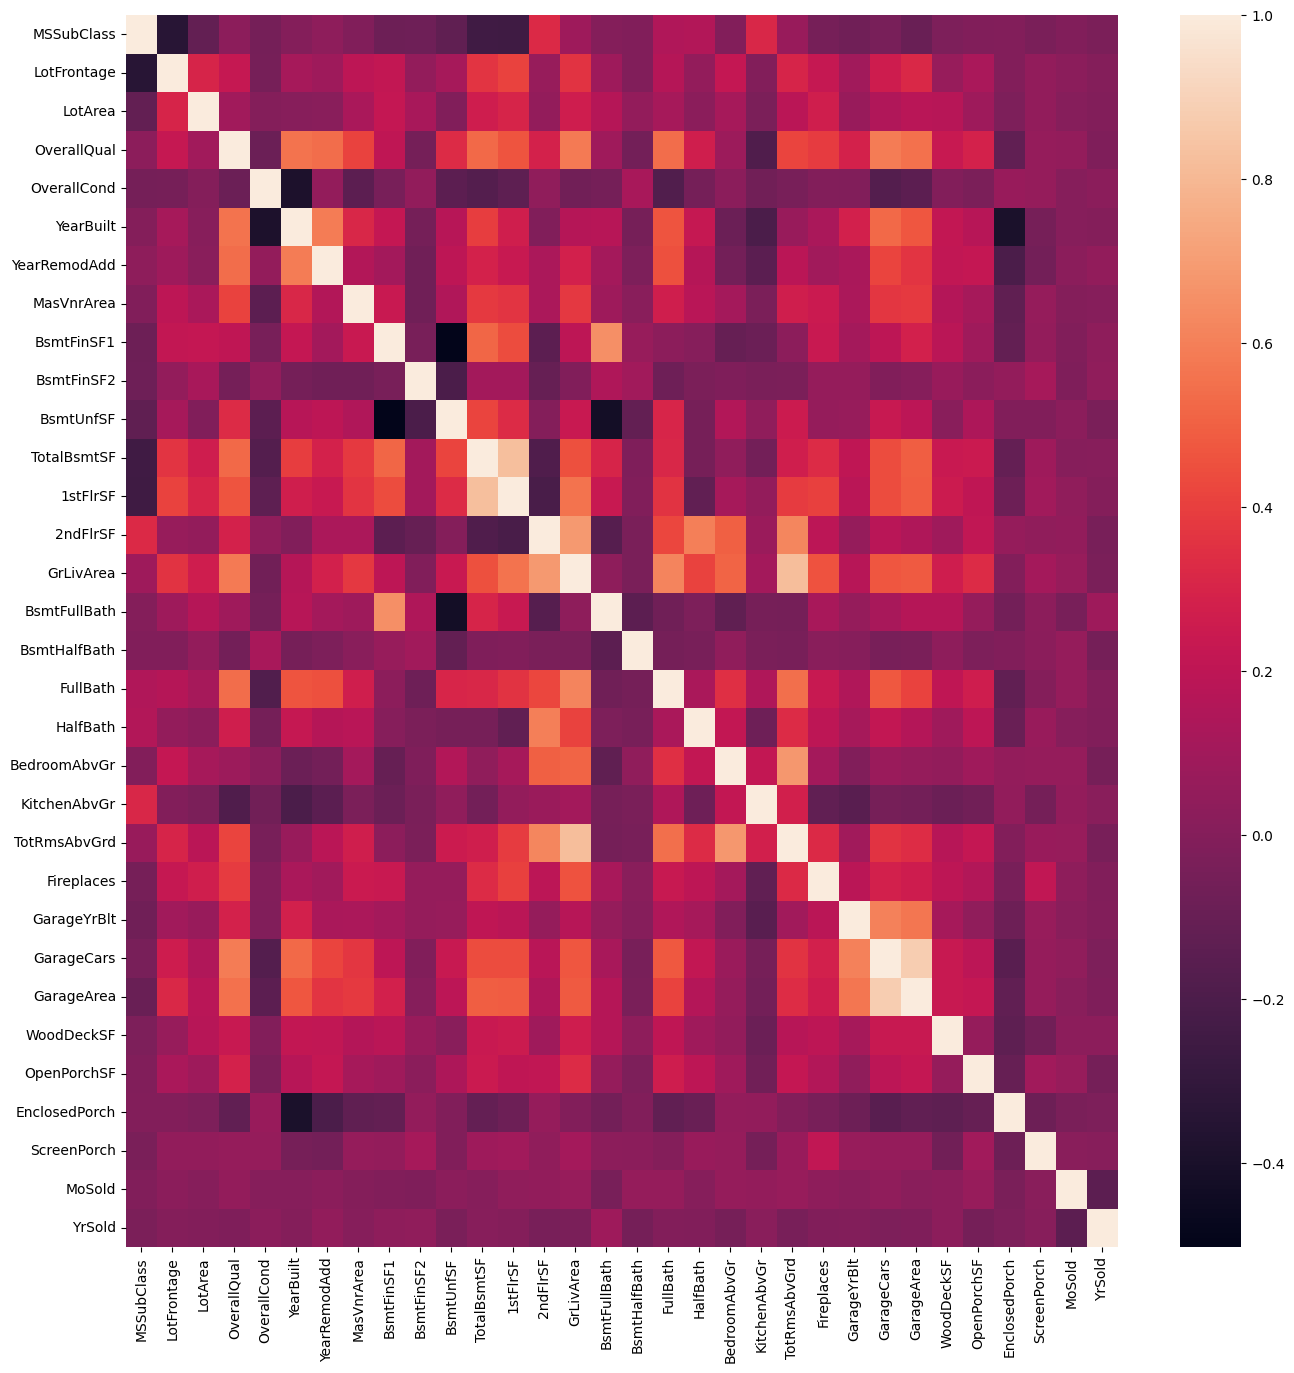

In [85]:
corrmat = X_train.select_dtypes(include=np.number).corr()
fig , ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat)

In [86]:
grouped_feature_ls = []
correlated_features_ls = []
def correlation(dataset , threshold):
  col_corr = set()
  corr_matrix = dataset.select_dtypes(include=np.number).corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

corr_features = correlation(X_train , 0.7)
correlated_features = list(set(corr_features))
print(len(correlated_features))

3


In [87]:
X_train = X_train.drop(columns=correlated_features)
X_test = X_test.drop(columns=correlated_features)

In [88]:
X_train.shape

(1168, 126)

In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

categorical_cols = X_train.select_dtypes(include='object').columns

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    encoders[col] = le # Store the fitted encoder


mi_scores = mutual_info_regression(X_train, y_train)

# Create a DataFrame for visualization
mi_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Info Score': mi_scores})

# Set the threshold for dropping features
threshold = 0.01

# Identify features to drop
features_to_drop = mi_df[mi_df['Mutual Info Score'] < threshold]['Feature']

print(f"Found {len(features_to_drop)} features to drop with Mutual Info score < {threshold}:")
print(list(features_to_drop))

X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

print("\nShape of x_train2 after final selection:", X_train.shape)
print("Shape of x_test2 after final selection:", X_test.shape)

Found 18 features to drop with Mutual Info score < 0.01:
['BsmtHalfBath', 'MoSold', 'YrSold', 'LotConfig_Corner', 'LotConfig_Inside', 'LandSlope_Mod', 'Condition1_Feedr', 'Exterior1st_Plywood', 'ExterCond_Gd', 'BsmtCond_Gd', 'BsmtCond_TA', 'BsmtExposure_Mn', 'BsmtFinType1_BLQ', 'BsmtFinType1_LwQ', 'BsmtFinType2_Unf', 'Functional_Typ', 'SaleCondition_Abnorml', 'SaleCondition_Normal']

Shape of x_train2 after final selection: (1168, 108)
Shape of x_test2 after final selection: (292, 108)


In [90]:
from sklearn.feature_selection import f_regression, SelectKBest
import pandas as pd

f_scores, p_values = f_regression(X_train, y_train)

regression_df = pd.DataFrame({
    'Feature': X_train.columns,
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values(by='P-Value')
print("Top 10 most significant features based on F-test:")
print(regression_df.head(10))

features_to_drop = regression_df[regression_df['P-Value'] > 0.05]['Feature']

print(f"\nFound {len(features_to_drop)} features to drop with a P-value > 0.05:")
print(list(features_to_drop))

X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

print("\nShape of X_train after F-test selection:", X_train.shape)
print("Shape of X_test after F-test selection:", X_test.shape)

Top 10 most significant features based on F-test:
           Feature      F-Score        P-Value
3      OverallQual  1879.151818  2.596140e-245
13       GrLivArea  1093.390361  1.081567e-169
21      GarageCars   813.186816  3.931616e-136
11     TotalBsmtSF   648.289096  4.473745e-114
66    ExterQual_TA   591.973984  4.437347e-106
15        FullBath   512.439469   2.457699e-94
71     BsmtQual_Ex   492.493738   2.650738e-91
5        YearBuilt   424.230726   1.225755e-80
90  KitchenQual_TA   418.220173   1.120645e-79
88  KitchenQual_Ex   413.303354   6.892678e-79

Found 8 features to drop with a P-value > 0.05:
['Exterior2nd_Plywood', 'HouseStyle_1Story', 'Neighborhood_Gilbert', 'HouseStyle_SLvl', 'LandContour_Lvl', 'Neighborhood_NWAmes', 'BldgType_TwnhsE', 'BsmtFinSF2']

Shape of X_train after F-test selection: (1168, 100)
Shape of X_test after F-test selection: (292, 100)


In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

lr_model = LinearRegression()

print("Training the Linear Regression model...")
lr_model.fit(X_train_scaled, y_train_log)
print("Training complete.")

y_pred_log = lr_model.predict(X_test_scaled)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
print(f"\nRoot Mean Squared Error (on log scale): {rmse_log:.4f}")

y_test_orig = np.expm1(y_test_log)
y_pred_orig = np.expm1(y_pred_log)

rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
print(f"RMSE on original dollar scale: ${rmse_orig:,.2f}")

Training the Linear Regression model...
Training complete.

Root Mean Squared Error (on log scale): 0.1429
RMSE on original dollar scale: $27,229.98


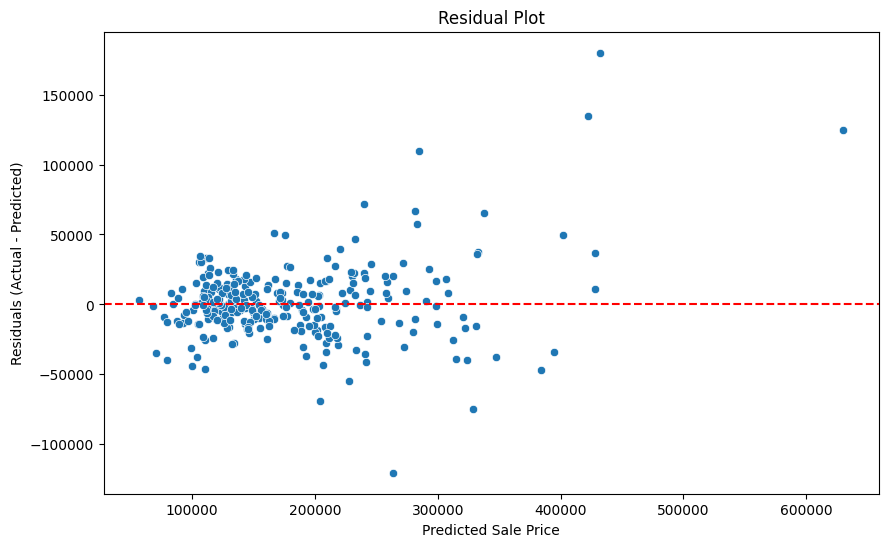

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns


residuals = y_test_orig - y_pred_orig

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_orig, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()